In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



In [2]:
import os
os.getcwd()

'C:\\Users\\frank_jk22l4o'

In [3]:
file_path = os.path.abspath('creditcard.csv')
print("File Path", file_path)

File Path C:\Users\frank_jk22l4o\creditcard.csv


In [4]:
new_directory = "C:\\Users\\frank_jk22l4o\downloads"
os.chdir(new_directory)

In [5]:
cc = pd.read_csv('creditcard.csv')

In [6]:
cc.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
print("\033[91m This is a Very Detailed Fraud Detection Analysis")
cc.info()

 This is a Very Detailed Fraud Detection Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20

In [8]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
cc_cleaned = cc.dropna()

In [11]:
print(cc_cleaned)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [12]:
cc_cleaned.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
# Checking For Missing values
missingdata = cc_cleaned.isnull().sum()
missingdata

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

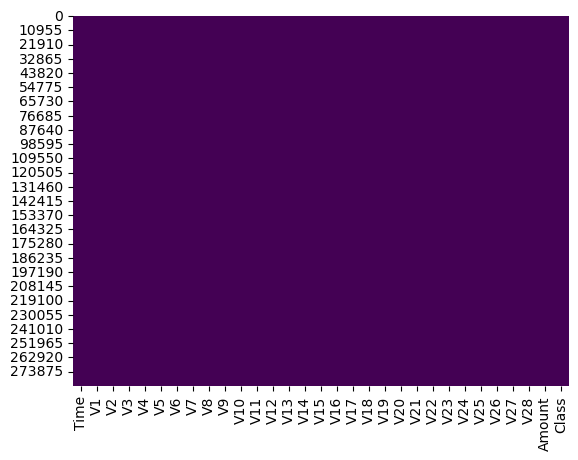

In [14]:
sns.heatmap(cc_cleaned.isnull(), cbar=False, cmap='viridis')
plt.show()

In [15]:
def transaction():
    for i in range(30):
        print("-", end="")

In [16]:
transaction()
print("\033[91m\n1 = Fraudulent\t0 = Legit")
transaction()

cc_cleaned.Class.value_counts()

------------------------------
1 = Fraudulent	0 = Legit
------------------------------

Class
0    284315
1       492
Name: count, dtype: int64

In [17]:
cc_cleaned.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
cc_cleaned.groupby('Class')['Amount'].mean()

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

In [19]:
# For Above ^ 88.9 is the average mean of data that lies in Class 0 and that are normal transactions.
# For Above ^ 122.2 is the average mean of data that lies in Class 1 and that are faulty transactions.

In [20]:
# Normalizing the data

norm_trans = cc_cleaned[cc_cleaned.Class==0]
f_trans = cc_cleaned[cc_cleaned.Class==1]

In [21]:
print(norm_trans.shape,f_trans.shape)

(284315, 31) (492, 31)


In [22]:
norm_trans = norm_trans.sample(n=492)

In [23]:
norm_trans.shape

(492, 31)

In [24]:
cc_new = pd.concat([norm_trans,f_trans])

In [25]:
cc_new.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138551,82718.0,-0.144511,0.224121,1.109071,0.846746,-1.543769,0.744762,1.082263,-0.019542,0.172396,...,0.228865,0.732812,0.343975,0.072260,-0.586382,-0.482619,0.039082,-0.108141,300.00,0
51725,45090.0,-0.576516,0.593863,1.790672,0.187901,-0.116811,-0.515673,0.943212,-0.287863,0.174292,...,-0.187207,-0.310514,-0.154360,0.389851,-0.143983,0.184925,-0.210263,-0.115712,52.04,0
183656,125896.0,1.941576,-0.032807,-0.610152,1.646305,-0.097767,-0.350460,0.052045,-0.166319,0.934865,...,-0.316661,-0.450065,0.224125,-0.012676,0.083353,-0.820505,0.049741,-0.040756,10.00,0
132479,80003.0,0.789921,-1.106316,0.871156,0.369516,-1.302417,0.128324,-0.545363,0.204605,1.345234,...,-0.100489,-0.491449,-0.049019,0.140852,-0.045425,0.954680,-0.061359,0.042678,203.96,0
275876,166766.0,1.713539,0.211588,-0.616591,3.675128,0.421280,0.460982,0.118945,0.030522,-1.133704,...,0.120524,0.204315,0.054054,-0.480522,-0.103266,-0.062018,-0.037882,-0.040450,97.00,0


In [26]:
cc_new.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


<function matplotlib.pyplot.show(close=None, block=None)>

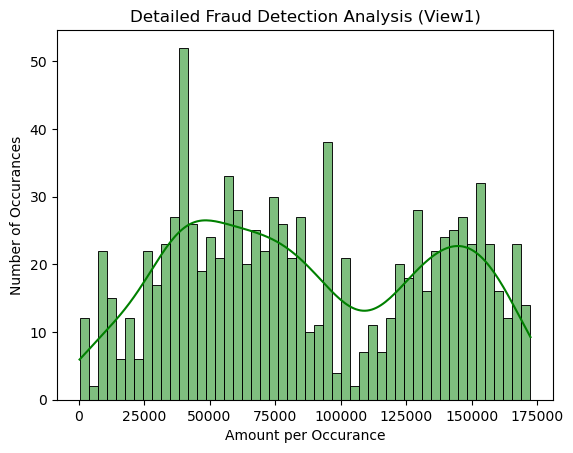

In [27]:
# Data Analysis & Validation

sns.histplot(data=cc_new,x='Time',color='green',bins=50,kde=True)
plt.title('Detailed Fraud Detection Analysis (View1)')
plt.xlabel('Amount per Occurance')
plt.ylabel('Number of Occurances')
plt.show

<Axes: xlabel='Amount', ylabel='Count'>

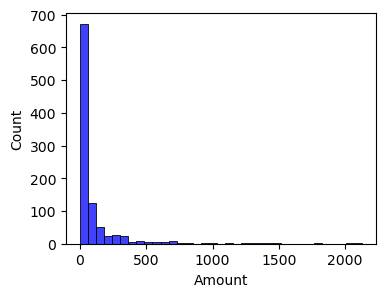

In [28]:
plt.figure(figsize=(4,3))
sns.histplot(data=cc_new, x='Amount',bins=35, color='blue')

<Axes: xlabel='Class', ylabel='count'>

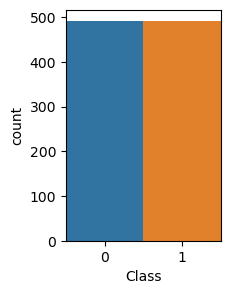

In [29]:
plt.figure(figsize=(2,3))
sns.countplot(data=cc_new,x='Class',width= 1.0)

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [31]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42) 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
Pipeline([ ('oversample', SMOTE(random_state=42)), ('undersample', RandomUnderSampler(random_state=42)), ('model', RandomForestClassifier(random_state=42)) ]) 

Pipeline(steps=[('oversample', SMOTE(random_state=42)),
                ('undersample', RandomUnderSampler(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [34]:
pipeline = SMOTE(random_state=42)

In [35]:
X_train, y_train = pipeline.fit_resample(X_train, y_train) 

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification 

In [37]:
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42) 

In [38]:
smote = SMOTE(random_state=42) 

In [39]:
X_resampled, y_resampled = smote.fit_resample(X, y) 


In [40]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()
X, y = iris.data, iris.target 

In [42]:
model = SVC() 

In [43]:
param_grid = {'C': [0.1, 1, 10, 100]} 

In [44]:
grid_search = GridSearchCV(model, param_grid, cv=5) 

In [45]:
grid_search.fit(X, y) 

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100]})

In [46]:
print("Best Parameters: ", grid_search.best_params_) 
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'C': 10}
Best Accuracy:  0.9800000000000001


In [47]:
# Train- Test Split, Hyper- Parameter Tuning & Model Selection

In [48]:
x = cc_new.drop(['Class'],axis='columns').values
y = cc_new.Class

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.5)

In [50]:
print(x_train.shape,x_test.shape)

(492, 30) (492, 30)


In [51]:
model_params = {
    
    'logistic_reg':{
            'model':LogisticRegression(),
            'params':{
                'C':[1,5,10,15,20]
            }
    },
    'randomforest':{
            'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[5,10,15,20,25]
            }
    }
}

In [52]:
score = []
for mod_name,mod in model_params.items():
    rscv = GridSearchCV(mod['model'],mod['params'],cv=2,return_train_score=False)
    rscv.fit(x_train,y_train)
    score.append({'model':mod_name,'best_score':rscv.best_score_,'best_parms':rscv.best_params_})

In [53]:
score

[{'model': 'logistic_reg',
  'best_score': 0.9268292682926829,
  'best_parms': {'C': 20}},
 {'model': 'randomforest',
  'best_score': 0.9349593495934959,
  'best_parms': {'n_estimators': 20}}]

In [54]:
model = LogisticRegression(C=10).fit(x_train,y_train)

In [55]:
model.score(x_test,y_test)

0.9308943089430894

In [56]:
y_predition = model.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,y_predition))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       246
           1       0.97      0.89      0.93       246

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492



In [59]:
matrix = confusion_matrix(y_test,y_predition)

In [60]:
matrix

array([[239,   7],
       [ 27, 219]], dtype=int64)

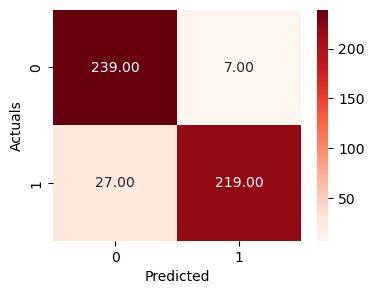

In [61]:
plt.figure(figsize=(4,3))
sns.heatmap(matrix,annot=True,fmt='.2f',cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

In [62]:
# Predictions

In [63]:
input_data = x_test[12]

In [64]:
input_data

array([ 4.26940000e+04,  1.13072349e+00,  2.66213080e-02,  2.52567793e-01,
        1.21867067e+00, -5.87161290e-02,  3.02518570e-01, -1.26235396e-01,
        2.29569697e-01,  2.61611452e-01,  8.19265830e-02,  6.33420122e-01,
        3.77073641e-01, -1.53540125e+00,  5.18517229e-01, -6.18296255e-01,
       -3.65351273e-01, -2.76075110e-02, -2.05129394e-01,  5.27412500e-02,
       -2.42844929e-01, -8.34006170e-02, -1.20932589e-01, -1.04514983e-01,
       -3.24819736e-01,  6.27793687e-01, -3.06013085e-01,  2.53206750e-02,
        7.67239000e-04,  1.52600000e+01])

In [65]:
model.fit(x_train,y_train)

LogisticRegression(C=10)

In [66]:
pred = model.predict([input_data])
if pred[0] == 1:
    print("It is Fault Transaction!")
else: 
    print("Transaction is good!")

Transaction is good!


In [67]:
# Cross Check

In [68]:
y_test[12:13]

46236    0
Name: Class, dtype: int64